In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_excel('full1_0_6.xlsx')
df2 = pd.read_excel('full1_0_38.xlsx')
df3 = pd.read_excel('full1_1_24.xlsx')
df4 = pd.read_excel('full2_0_9.xlsx')
df5 = pd.read_excel('full2_0_44.xlsx')
df6 = pd.read_excel('full2_1_29.xlsx')

In [11]:
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [19]:
df

,time,d_kda,d_k,d_d,d_a,d_gold,n_chat
0,0:08:41,0,0,0,0,1.000000,0
1,0:08:42,0,0,0,0,0.059574,0
2,0:08:43,0,0,0,0,0.060993,0
3,0:08:48,0,0,0,0,0.058156,0
4,0:08:52,0,0,0,0,0.060993,0
...,...,...,...,...,...,...,...
1203,2:05:32,1,0,1,0,0.022624,1
1204,2:05:33,1,0,1,0,0.022624,1
1205,2:05:34,0,0,0,0,0.022624,0
1206,2:05:35,0,0,0,0,0.022624,0


# 3-1. train test를 구분하여 model의 정확도 확인

In [20]:
seed = 0
np.random.seed(seed)   # seed 값 설정
tf.random.set_seed(seed)

In [21]:
dataset = df.values

In [22]:
X = dataset[:,1:6]
Y = dataset[:,6]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [24]:
model = Sequential()
model.add(Dense(15, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy',   optimizer='adam',     metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=130, batch_size=5)

Epoch 1/130
3984/3984 [==============================] - 1s 190us/step - loss: 0.4418 - accuracy: 0.8602
Epoch 2/130
3984/3984 [==============================] - 1s 142us/step - loss: 0.3614 - accuracy: 0.8662
Epoch 3/130
3984/3984 [==============================] - 1s 142us/step - loss: 0.3605 - accuracy: 0.8670
Epoch 4/130
3984/3984 [==============================] - 1s 138us/step - loss: 0.3596 - accuracy: 0.8705
Epoch 5/130
3984/3984 [==============================] - 1s 146us/step - loss: 0.3588 - accuracy: 0.8700
Epoch 6/130
3984/3984 [==============================] - 1s 141us/step - loss: 0.3587 - accuracy: 0.8717
Epoch 7/130
3984/3984 [==============================] - 1s 143us/step - loss: 0.3585 - accuracy: 0.8727
Epoch 8/130
3984/3984 [==============================] - 1s 134us/step - loss: 0.3582 - accuracy: 0.8720
Epoch 9/130
3984/3984 [==============================] - 1s 140us/step - loss: 0.3575 - accuracy: 0.8727
Epoch 10/130
3984/3984 [==============================]

In [26]:
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

1708/1708 [==============================] - 0s 19us/step

 Test Accuracy: 0.8706


# 3-2. 전체 데이터를 이용해 model을 완성한 후 추가 테스트 영상에서 정확성 검증

In [32]:
X = dataset[:,1:6]
Y = dataset[:,6]

In [33]:
model = Sequential()
model.add(Dense(15, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy',   optimizer='adam',     metrics=['accuracy'])
model.fit(X, Y, epochs=130, batch_size=5)

Epoch 1/130
5692/5692 [==============================] - 1s 156us/step - loss: 0.4451 - accuracy: 0.8624
Epoch 2/130
5692/5692 [==============================] - 1s 144us/step - loss: 0.3621 - accuracy: 0.8649
Epoch 3/130
5692/5692 [==============================] - 1s 125us/step - loss: 0.3609 - accuracy: 0.8656
Epoch 4/130
5692/5692 [==============================] - 1s 131us/step - loss: 0.3607 - accuracy: 0.8630
Epoch 5/130
5692/5692 [==============================] - 1s 154us/step - loss: 0.3600 - accuracy: 0.8665
Epoch 6/130
5692/5692 [==============================] - 1s 135us/step - loss: 0.3594 - accuracy: 0.8674
Epoch 7/130
5692/5692 [==============================] - 1s 136us/step - loss: 0.3600 - accuracy: 0.8667
Epoch 8/130
5692/5692 [==============================] - 1s 145us/step - loss: 0.3593 - accuracy: 0.8668
Epoch 9/130
5692/5692 [==============================] - 1s 141us/step - loss: 0.3594 - accuracy: 0.8684
Epoch 10/130
5692/5692 [==============================]

In [43]:
test_df = pd.read_excel('dataset.xlsx')

In [44]:
dataset = test_df.values

In [50]:
X = dataset[:,1:6]
Y = dataset[:,[0,6]]

In [62]:
testdata = model.predict(X)

In [63]:
testdata

array([[0.10634492],
       [0.10562336],
       [0.10348453],
       [0.09563711],
       [0.08925033],
       [0.0778932 ],
       [0.07007405],
       [0.07007405],
       [0.07057191],
       [0.07057191],
       [0.07653669],
       [0.07734799],
       [0.08325077],
       [0.08741061],
       [0.0953083 ],
       [0.10069241],
       [0.10383831],
       [0.10383831],
       [0.10313182],
       [0.10313182],
       [0.10313182],
       [0.10313182],
       [0.31854755],
       [0.33785194],
       [0.33785194],
       [0.33785194],
       [0.33785194],
       [0.33785194],
       [0.42913002],
       [0.41596156],
       [0.37653852],
       [0.3755362 ],
       [0.3755363 ],
       [0.3755363 ],
       [0.39475372],
       [0.36808214],
       [0.34795806],
       [0.34795806],
       [0.34795806],
       [0.34795806],
       [0.34795806],
       [0.05801112],
       [0.06231537],
       [0.07707668],
       [0.10000491],
       [0.10000491],
       [0.10000491],
       [0.114

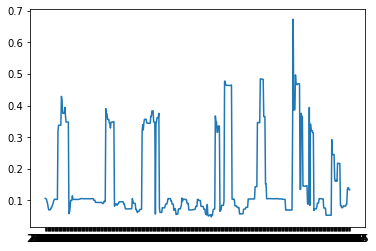

In [80]:
plt.plot(dataset[:,0],testdata)

In [82]:
aa=[]
bb=[]
for i,d in enumerate(testdata):
    if d > 0.2:
        print(Y[i][0])
        aa.append(Y[i][0])
#         bb.append(Y[i][1])
#         print(i)

2:09:18
2:09:19
2:09:20
2:09:21
2:09:22
2:09:23
2:09:24
2:09:25
2:09:26
2:09:27
2:09:28
2:09:29
2:09:31
2:09:36
2:09:37
2:09:38
2:09:39
2:09:40
2:09:41
2:11:02
2:11:03
2:11:04
2:11:05
2:11:06
2:11:07
2:11:08
2:11:10
2:11:13
2:11:14
2:11:15
2:11:16
2:11:17
2:11:18
2:11:19
2:12:33
2:12:34
2:12:35
2:12:36
2:12:37
2:12:38
2:12:39
2:12:40
2:12:41
2:12:42
2:12:43
2:12:44
2:12:45
2:12:46
2:12:47
2:12:48
2:12:49
2:12:50
2:12:51
2:12:52
2:12:54
2:12:55
2:12:56
2:12:58
2:12:59
2:13:00
2:13:01
2:13:02
2:13:03
2:16:17
2:16:19
2:16:20
2:16:21
2:16:24
2:16:26
2:16:31
2:16:32
2:16:42
2:16:43
2:16:46
2:16:47
2:16:48
2:16:49
2:16:50
2:16:51
2:16:52
2:16:53
2:16:54
2:16:55
2:16:57
2:18:06
2:18:07
2:18:08
2:18:09
2:18:10
2:18:11
2:18:12
2:18:13
2:18:14
2:18:15
2:18:16
2:18:17
2:18:18
2:18:20
2:19:25
2:19:26
2:19:28
2:19:29
2:19:30
2:19:32
2:19:35
2:19:36
2:19:37
2:19:38
2:19:39
2:19:42
2:19:43
2:19:47
2:19:48
2:19:49
2:20:29
2:20:35
2:20:38
2:20:41
2:20:42
2:20:44
2:20:46
2:21:22
2:21:23
2:21:25
2:21:26
